# Problem Statement:
- Goal is to create a model which will be able to predict all positive class as positive only.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Client.csv')
df

,Unnamed: 0,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,5,1,0.0,1.0,0.0,50.0,34.940
1,1,3,0,1.0,0.0,0.0,18.0,0.891
2,2,66,0,0.0,1.0,0.0,5.0,0.330
3,3,70,1,0.0,1.0,1.0,31.0,0.037
4,4,96,0,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...,...
1335,1335,34100,0,0.0,1.0,0.0,NaN,0.576
1336,1336,34110,1,1.0,1.0,0.0,46.0,3.705
1337,1337,34113,0,1.0,1.0,0.0,39.0,0.099
1338,1338,34145,1,1.0,0.0,0.0,8.0,3.177


# EDA

In [3]:
df.drop(columns=['Unnamed: 0','CASENUM'], inplace=True)

In [4]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038


In [5]:
df.shape

(1340, 6)

In [6]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

# Missing Value imputation

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
si = SimpleImputer(strategy='most_frequent')

In [10]:
df.iloc[:,1:4] = si.fit_transform(df.iloc[:,1:4])

In [12]:
df['CLMAGE'].fillna(df['CLMAGE'].mean(), inplace=True)

In [13]:
df.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

# Splitting the data into training and testing set.

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
x = df.iloc[:,1:]
y = df['ATTORNEY']

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.75,random_state=1)

In [18]:
xtrain

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1045,1.0,1.0,0.0,37.000000,0.935
969,0.0,1.0,0.0,14.000000,10.869
594,1.0,1.0,0.0,43.000000,0.007
1081,1.0,1.0,0.0,77.000000,1.000
1053,1.0,1.0,0.0,58.000000,9.485
...,...,...,...,...,...
715,0.0,1.0,0.0,13.000000,6.979
905,0.0,1.0,0.0,28.414422,3.330
1096,0.0,1.0,0.0,50.000000,3.095
235,1.0,1.0,0.0,17.000000,1.619


# Model Building

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lg = LogisticRegression()

In [21]:
#Train the model
lg.fit(xtrain,ytrain)

#Prediction
ypred = lg.predict(xtest)

In [22]:
len(xtest)

335

In [23]:
len(ypred)

335

# Model Evaluation

In [24]:
print('Actual Y: ', ytest[:25].values)
print('Predict Y:', ypred[:25])

Actual Y:  [0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0]
Predict Y: [0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0]


In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71       169
           1       0.71      0.57      0.64       166

    accuracy                           0.67       335
   macro avg       0.68      0.67      0.67       335
weighted avg       0.68      0.67      0.67       335



In [27]:
confusion_matrix(ytest,ypred)

array([[131,  38],
       [ 71,  95]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted Values')

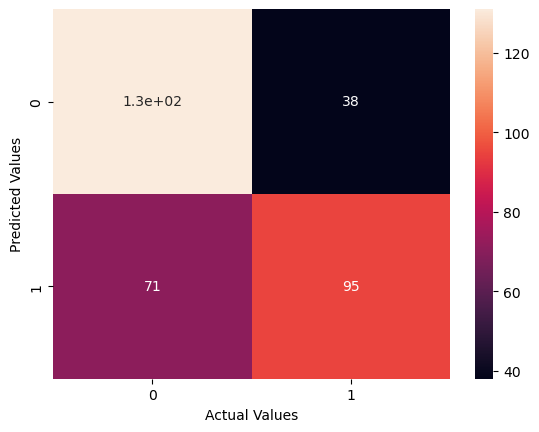

In [28]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [32]:
print(ytest[:25].values)
print(ypred[:25])

[0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0]
[0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0]


# Threshold selection

In [36]:
proba = lg.predict_proba(xtest)[:,1]
proba

array([0.30452531, 0.31877703, 0.44367414, 0.38921733, 0.59269384,
       0.36956317, 0.30038704, 0.54692511, 0.33818035, 0.33127783,
       0.44228109, 0.38675009, 0.39055992, 0.59112026, 0.33552674,
       0.57245686, 0.43372324, 0.45788059, 0.35447774, 0.33139277,
       0.31723268, 0.40883429, 0.62290217, 0.41041013, 0.40151401,
       0.36355281, 0.29759251, 0.37764075, 0.39961214, 0.32114247,
       0.40983596, 0.3643934 , 0.44023927, 0.73202738, 0.75057933,
       0.39110034, 0.64453762, 0.54259562, 0.35093269, 0.30951188,
       0.32152608, 0.99986938, 0.49897881, 0.47033417, 0.43391175,
       0.60194141, 0.27722799, 0.32353764, 0.37622974, 0.41463054,
       0.42522759, 0.32120318, 0.31797751, 0.42228205, 0.45048237,
       0.36964963, 0.73649517, 0.34719582, 0.82840481, 0.34623401,
       0.57875229, 0.63721819, 0.36956317, 0.91182407, 0.59604453,
       0.85704698, 0.3448188 , 0.87716263, 0.53214663, 0.8516612 ,
       0.74748072, 0.65094849, 0.3198435 , 0.41479701, 0.63726

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

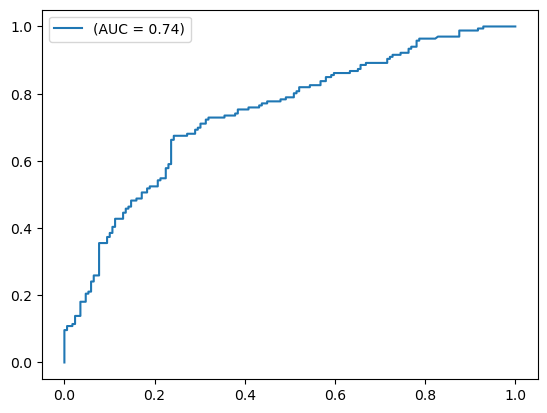

In [66]:
auc = roc_auc_score(ytest,proba)

fpr,tpr, threshold = roc_curve(ytest,proba)

plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()

In [64]:
auc

0.7413381335994866

In [62]:
threshold

array([2.        , 1.        , 0.90701854, 0.90641378, 0.90159902,
       0.87716263, 0.86023778, 0.85704698, 0.831285  , 0.8173157 ,
       0.76368107, 0.75653791, 0.75057933, 0.74748072, 0.74599478,
       0.74250907, 0.73116688, 0.71678622, 0.69687766, 0.69050359,
       0.64231766, 0.63663173, 0.6288054 , 0.62373652, 0.61941853,
       0.61865162, 0.61336854, 0.60880523, 0.59789666, 0.59492775,
       0.59112026, 0.58991005, 0.58878439, 0.58722189, 0.58623377,
       0.58555852, 0.57358614, 0.57244381, 0.57219421, 0.57028814,
       0.5685665 , 0.56035964, 0.5543461 , 0.55137603, 0.54692511,
       0.53860734, 0.53214663, 0.5297742 , 0.52533484, 0.51516316,
       0.49898784, 0.49897881, 0.49254307, 0.49077152, 0.44721729,
       0.44367414, 0.44206802, 0.43741415, 0.43539918, 0.43432415,
       0.43372324, 0.43286316, 0.43164517, 0.42833823, 0.42580737,
       0.42522759, 0.42338761, 0.42236918, 0.42228205, 0.41893198,
       0.41730687, 0.41479701, 0.41463054, 0.41404282, 0.41132

In [61]:
len(threshold)

140

In [49]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

final_threshold = pd.concat([pd.Series(threshold),pd.Series(accuracy)], axis=1)
final_threshold.columns = ['Threshold','Accuracy']

In [51]:
final_threshold.sort_values(by='Accuracy', ascending=False)

,Threshold,Accuracy
56,0.442068,0.713433
55,0.443674,0.713433
54,0.447217,0.710448
67,0.422369,0.704478
57,0.437414,0.704478
...,...,...
136,0.299849,0.531343
137,0.299543,0.528358
0,2.000000,0.504478
1,1.000000,0.504478


In [52]:
from sklearn.preprocessing import binarize

In [59]:
y = binarize([proba], threshold=0.442068)[0]
y

array([0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0.

In [60]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       169
           1       0.73      0.67      0.70       166

    accuracy                           0.72       335
   macro avg       0.72      0.72      0.72       335
weighted avg       0.72      0.72      0.72       335

